In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [25]:
df=pd.read_csv(r'C:\Users\sikandar singh sekho\Desktop\College\MBA-IT\sem 3\Fundamentals of Data Science\Admission_Predict.csv')

In [26]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [96]:
df.size

3200

In [55]:
df.drop(columns=['Serial No.'],inplace=True)

In [56]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [62]:
dataframe=df[['GRE Score','Chance of Admit ']].copy()

Text(0, 0.5, 'Chances of Admit')

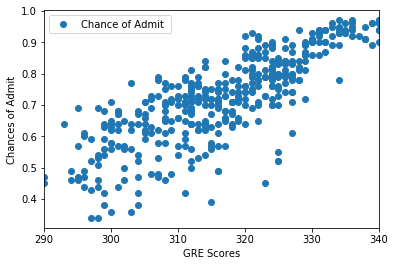

In [63]:
dataframe.plot(x="GRE Score",y="Chance of Admit ",style="o")
plt.xlabel("GRE Scores")
plt.ylabel("Chances of Admit")

In [67]:
x=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,1]

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [74]:
model=LinearRegression().fit(x_train,y_train)

In [75]:
print(model.intercept_)

-2.4807599906587905


In [76]:
print(model.coef_)

[0.01012352]


In [77]:
y_pred=model.predict(x_test)

In [80]:
data=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
data.head(5)

,Actual,Predicted
132,0.71,0.647408
309,0.70,0.637285
341,0.79,0.819508
196,0.73,0.617037
246,0.72,0.718273


### Multiple Regression

In [82]:
a=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
b=df['Chance of Admit ']

In [83]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

In [84]:
model2 = LinearRegression().fit(a_train, b_train)

In [87]:
coeff_df = pd.DataFrame(model2.coef_, a.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GRE Score,0.002071
TOEFL Score,0.001955
University Rating,0.006572
SOP,-0.004728
LOR,0.021184
CGPA,0.124632
Research,0.024144


In [89]:
intercept_df=pd.DataFrame(model2.intercept_,a.columns,columns=['Intercept'])
intercept_df

,Intercept
GRE Score,-1.304714
TOEFL Score,-1.304714
University Rating,-1.304714
SOP,-1.304714
LOR,-1.304714
CGPA,-1.304714
Research,-1.304714


In [90]:
b_pred = model2.predict(a_test)

In [92]:
data2 = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred})
data2.head()

,Actual,Predicted
132,0.71,0.697913
309,0.70,0.693439
341,0.79,0.778827
196,0.73,0.615774
246,0.72,0.722820
